In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

On réimporte le jeu de données nettoyé :

In [2]:
df_joined_cleaned = pd.read_csv('P4_jeu_de_donnees_nettoye.csv', low_memory=False)

## 1 - Modelisation de l'énergie consommée 

### 1.1. Modélisation de l'énergie consommée :  choix du modèle

In [3]:
SiteEnergyUse_kBtu_mean = df_joined_cleaned['SiteEnergyUse(kBtu)'].mean()

In [4]:
SiteEnergyUse_kBtu_median = df_joined_cleaned['SiteEnergyUse(kBtu)'].median()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot, prediction_error

On effectue un paramétrage visuel de Scikit-Learn :

In [6]:
sklearn.set_config(display="diagram")

On définit une fonction pour évaluer les performances des modèles :

In [7]:
def model_performance(y_test, y_pred):

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_div_mean = rmse / SiteEnergyUse_kBtu_mean
    rmse_div_median = rmse / SiteEnergyUse_kBtu_median
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("RMSE: ", rmse)
    print("RMSE/mean: ", rmse_div_mean)
    print("RMSE/median: ", rmse_div_median)
    print("R²: ", r_score.round(5))

In [8]:
pd.options.display.max_columns = df_joined_cleaned.shape[1]
df_joined_cleaned.head()

,TaxParcelIdentificationNumber,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
0,0000000000,Nonresidential COS,Non-Compliant,Other,GREATER DUWAMISH,Other,NaN,2.0,75.0,72371.0,39212.0,0.0,1.0,2.0,39212.0,0.0,39212.0,NaN,7.237040e+04,5.800000,0.0,NaN,0.50,1906.0,98108.0,110.0
1,0001800033,NonResidential,Compliant,Office,GREATER DUWAMISH,Mixed Use Property,Non-Refrigerated Warehouse,2.0,75.0,1689972.0,23751.0,352799.0,1.0,1.0,44700.0,0.0,44700.0,14024.0,2.042771e+06,118.599998,0.0,10095.0,30.52,1962.0,98108.0,54.0
2,0001800113,NonResidential,Compliant,Non-Refrigerated Warehouse,GREATER DUWAMISH,Warehouse,NaN,2.0,97.0,371850.0,119200.0,1437252.0,1.0,1.0,128800.0,0.0,128800.0,9600.0,1.809102e+06,20.799999,0.0,NaN,78.92,1977.0,98108.0,39.0
3,0001800128,NonResidential,Compliant,Non-Refrigerated Warehouse,GREATER DUWAMISH,Warehouse,NaN,2.0,1.0,1618916.0,40000.0,0.0,1.0,1.0,44100.0,0.0,44100.0,NaN,1.618916e+06,127.099998,0.0,NaN,11.29,1976.0,98108.0,40.0
4,0001800137,Campus,Compliant,College/University,GREATER DUWAMISH,University,NaN,2.0,75.0,4967236.0,149856.0,1368079.0,4.0,2.0,149856.0,0.0,149856.0,NaN,6.335316e+06,113.699997,0.0,NaN,107.29,2007.0,98108.0,9.0


In [9]:
df_joined_cleaned.isna().sum()

TaxParcelIdentificationNumber         0
BuildingType                          0
ComplianceStatus                      0
LargestPropertyUseType                0
Neighborhood                          0
PrimaryPropertyType                   0
ThirdLargestPropertyUseType        1401
CouncilDistrictCode                   0
ENERGYSTARScore                       0
Electricity(kBtu)                     0
LargestPropertyUseTypeGFA             0
NaturalGas(kBtu)                      0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
SecondLargestPropertyUseTypeGFA     840
SiteEnergyUse(kBtu)                   0
SourceEUI(kBtu/sf)                    0
SteamUse(kBtu)                        0
ThirdLargestPropertyUseTypeGFA     1390
TotalGHGEmissions                     0
YearBuilt                             0
ZipCode                               0


In [10]:
pd.options.display.max_columns = df_joined_cleaned.shape[1]
df_joined_cleaned.describe()

,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
count,1792.000000,1792.000000,1.792000e+03,1.792000e+03,1.792000e+03,1792.000000,1792.000000,1.792000e+03,1792.000000,1.792000e+03,952.000000,1.792000e+03,1792.000000,1.792000e+03,402.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,4.547991,68.835510,6.023789e+06,1.010625e+05,2.005211e+06,1.085938,4.704739,1.079150e+05,15357.033436,1.232720e+05,39404.477413,8.500698e+06,175.815722,4.502914e+05,14710.814178,183.269387,1960.770703,59584.460119,54.743713
std,2.209488,22.965583,1.490536e+07,1.696224e+05,9.192174e+06,0.912837,7.501207,1.814334e+05,45469.346829,2.074285e+05,70293.119589,2.193181e+07,190.702739,4.330423e+06,34852.380354,657.355060,32.770541,21189.665723,32.762951
min,1.000000,1.000000,0.000000e+00,6.455000e+03,0.000000e+00,0.000000,0.000000,1.092500e+04,0.000000,2.000000e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1900.000000,17919.000000,1.000000
25%,2.000000,61.000000,7.544721e+05,2.587175e+04,0.000000e+00,1.000000,1.000000,2.905925e+04,0.000000,3.022300e+04,6149.750000,1.260939e+06,77.575001,0.000000e+00,2827.750000,20.465000,1929.000000,58240.000000,27.500000
50%,5.000000,75.000000,1.707536e+06,4.516450e+04,5.125765e+05,1.000000,3.000000,4.925050e+04,0.000000,5.125800e+04,13124.000000,2.612478e+06,132.150002,0.000000e+00,6129.000000,53.847500,1964.600000,58249.500000,51.000000
75%,7.000000,82.000000,5.271904e+06,9.754988e+04,1.533846e+06,1.000000,5.000000,1.021082e+05,0.000000,1.157955e+05,36131.250000,7.456678e+06,200.862501,0.000000e+00,13364.250000,154.108750,1988.000000,58857.500000,86.500000
max,7.000000,100.000000,2.847263e+08,1.719643e+06,2.979090e+08,20.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,686750.000000,4.483853e+08,2620.000000,1.314066e+08,459748.000000,16870.980000,2015.000000,98199.000000,116.000000


On créé le jeu d'entraînement (train_set) et le jeu de test (test_set). <br>
On effectue une stratification des données basée sur la variable "PrimaryPropertyType"

In [11]:
# Création d'un jeu d'entrainement (train set) et d'un jeu de test (test set)
# Stratification sur la variable "type de propriété"
train_set, test_set = train_test_split(df_joined_cleaned, test_size=0.3, random_state=42, stratify=df_joined_cleaned["PrimaryPropertyType"])

y_train = train_set[["SiteEnergyUse(kBtu)"]]
y_test = test_set[["SiteEnergyUse(kBtu)"]]
X_train = train_set.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], axis=1)
X_test = test_set.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], axis=1)

In [12]:
df_joined_cleaned.shape

(1792, 26)

In [13]:
X_train.shape

(1254, 24)

In [14]:
X_test.shape

(538, 24)

In [15]:
y_train.shape

(1254, 1)

In [16]:
y_test.shape

(538, 1)

On définit les variables qualitatives et quantitatives :

In [17]:
quali_var = ["PrimaryPropertyType", "LargestPropertyUseType"]
quanti_var = ["LargestPropertyUseTypeGFA",
 "NumberofBuildings", "NumberofFloors",
"PropertyGFATotal", "YearBuilt", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"]

In [18]:
df_joined_cleaned.columns.tolist()

['TaxParcelIdentificationNumber',
 'BuildingType',
 'ComplianceStatus',
 'LargestPropertyUseType',
 'Neighborhood',
 'PrimaryPropertyType',
 'ThirdLargestPropertyUseType',
 'CouncilDistrictCode',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'LargestPropertyUseTypeGFA',
 'NaturalGas(kBtu)',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'ZipCode',
 'Building_Age']

On créé le pipeline de transformation

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

quali_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

quanti_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('qualitative', quali_pipe, quali_var),
    ('quantitative', quanti_pipe, quanti_var)
])

On transforme les variables :

In [20]:
X_train = preprocessor.fit_transform(X_train)

In [21]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train, y_train)

DummyRegressor(strategy='median')

On effectue une prédiction avec le dummy regressor et on évalue le modèle:

In [22]:
X_test = preprocessor.transform(X_test)
y_pred = dummy_reg.predict(X_test)
model_performance(np.array(y_test), y_pred)

RMSE:  20036835.444967512
RMSE/mean:  2.3570811201340662
RMSE/median:  7.669667955269764
R²:  -0.08648


On initie les diférents modèles :

In [23]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

dummy_reg = DummyRegressor(strategy="median")
lin_reg = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
svm_reg = SVR()
rdmforest = RandomForestRegressor(random_state=42, n_estimators=500)
xgboost = xgb.XGBRegressor(random_state=42)

On effectue les entraînements pour chaque modèle sans optimiser les hyperparamètres.

In [24]:
model = [dummy_reg, lin_reg, ridge, lasso, svm_reg, rdmforest, xgboost, GradientBoostingRegressor()]
dict_model = {}

for model in model:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_div_mean = rmse / SiteEnergyUse_kBtu_mean
    rmse_div_median = rmse / SiteEnergyUse_kBtu_median
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(3)
    dict_model[model] = (rmse.round(3), rmse_div_mean, rmse_div_median, r_score)

eval_model = pd.DataFrame(dict_model, index=["RMSE", "RMSE/mean", "RMSE/median",  "R²"])
eval_model.columns = ["Dummy Regressor", "Linear Regression", "Ridge", "Lasso", "SVM", "Random Forest", "XGBoost", "GradientBoostingRegressor"]

eval_model

/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7130972659891976e+16, tolerance: 66262594954545.695
  model = cd_fast.enet_coordinate_descent(


,Dummy Regressor,Linear Regression,Ridge,Lasso,SVM,Random Forest,XGBoost,GradientBoostingRegressor
RMSE,2.003684e+07,1.003649e+19,1.343012e+07,1.310292e+07,2.003681e+07,1.638028e+07,2.184854e+07,1.674608e+07
RMSE/mean,2.357081e+00,1.180667e+12,1.579884e+00,1.541393e+00,2.357078e+00,1.926933e+00,2.570205e+00,1.969965e+00
RMSE/median,7.669668e+00,3.841753e+12,5.140758e+00,5.015514e+00,7.669658e+00,6.270016e+00,8.363150e+00,6.410038e+00
R²,-8.600000e-02,-2.726022e+23,5.120000e-01,5.350000e-01,-8.600000e-02,2.740000e-01,-2.920000e-01,2.410000e-01


Lasso donne le meilleur résultat.

### 1.2. Modélisation de l'énergie consommée :  choix des hyperparamètres

In [25]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

On optimise l'hyperparamètre alpha (ou lambda) du Lasso en effectuant une Grid Search:

In [26]:
alphas_lasso = np.array([20, 10, 5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0])

In [27]:
grid = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas_lasso), scoring="neg_mean_squared_error")

In [28]:
grid.fit(X_train, y_train)

/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6550085118499216e+16, tolerance: 32125516589410.727
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3720942592963304e+16, tolerance: 61042138065662.19
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.992627592711912e+16, tolerance: 63519432453248.3
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.

/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.576194843416079e+16, tolerance: 63519432453248.3
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0291400929138116e+16, tolerance: 46583342810785.07
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4824136628408856e+16, tolerance: 61664543272981.086
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.

/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0291399727240016e+16, tolerance: 46583342810785.07
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.482413220130129e+16, tolerance: 61664543272981.086
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.173440046149039e+16, tolerance: 32125516589410.727
  model = cd_fast.enet_coordinate_descent(
/Users/moninechan/opt/anaconda3/lib/python3

GridSearchCV(estimator=Lasso(random_state=42),
             param_grid={'alpha': array([2.e+01, 1.e+01, 5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00,
       1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             scoring='neg_mean_squared_error')

In [29]:
print(grid.best_estimator_.alpha)
print(grid.best_score_)


20.0
-360938026247679.06


In [30]:
grid.best_params_

{'alpha': 20.0}

In [31]:
df_alphas_lasso = pd.DataFrame(grid.cv_results_)

In [32]:
df_alphas_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.211329,0.167986,0.004092,0.000764,20.0,{'alpha': 20.0},-9.150930e+14,-2.361286e+14,-5.324531e+13,-5.267122e+14,-7.351101e+13,-3.609380e+14,3.247877e+14,1
1,0.230220,0.123527,0.004919,0.001797,10.0,{'alpha': 10.0},-9.151623e+14,-2.361370e+14,-5.327330e+13,-5.267107e+14,-7.347451e+13,-3.609516e+14,3.248117e+14,2
2,0.153558,0.045661,0.004264,0.000707,5.0,{'alpha': 5.0},-9.151959e+14,-2.361430e+14,-5.328748e+13,-5.267102e+14,-7.345260e+13,-3.609578e+14,3.248239e+14,3
3,0.189435,0.107885,0.004425,0.000919,0.5,{'alpha': 0.5},-9.152358e+14,-2.361498e+14,-5.330981e+13,-5.267129e+14,-7.343086e+13,-3.609678e+14,3.248369e+14,5
4,0.147030,0.012246,0.004655,0.000650,0.05,{'alpha': 0.05},-9.152396e+14,-2.361506e+14,-5.331183e+13,-5.267133e+14,-7.342869e+13,-3.609688e+14,3.248381e+14,7


In [33]:
df_alphas_lasso["param_alpha"] = df_alphas_lasso.params.apply(lambda x: x["alpha"])

Text(0, 0.5, 'mean_test_score')

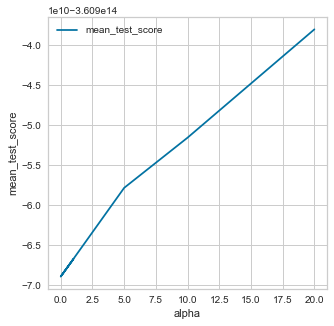

In [34]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot()
df_alphas_lasso.set_index("param_alpha")[["mean_test_score"]].plot(ax=ax)
ax.set_xlabel("alpha")
ax.set_ylabel("mean_test_score")

In [35]:
y_pred_lasso = grid.predict(X_test)

In [36]:
rmse_y_pred_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [37]:
rmse_y_pred_lasso

13098199.123200385

In [38]:
print(y_test)

      SiteEnergyUse(kBtu)
1043         2.797650e+06
1302         1.023618e+06
1344         4.433319e+06
684          1.261799e+06
165          2.067352e+06
...                   ...
997          8.586568e+05
1399         6.626558e+06
441          4.493960e+06
1351         8.219536e+05
161          1.062723e+06

[538 rows x 1 columns]


In [39]:
print(y_pred_lasso)

[ 3.60886063e+06 -1.47764281e+06  6.27775989e+06  1.22196719e+07
  4.26144721e+06  7.12829046e+06  7.57746814e+06  3.66232135e+06
  1.68584193e+06  9.14387656e+06  9.40183496e+06  1.38057488e+06
 -7.72478158e+06  7.98719741e+06  2.22132156e+06  8.42864221e+06
  6.16547001e+06 -1.45708655e+05  4.02055432e+06  8.21127174e+06
 -4.17856135e+05  3.73000412e+06  9.70260066e+06  3.41100623e+06
  1.83624375e+06  1.78947876e+06  3.39589874e+06  1.25531435e+07
  8.70274605e+06  3.07840914e+06  4.04183244e+06  3.12379403e+06
  1.90973998e+06  1.46151221e+08  1.26384722e+06  1.05602320e+07
  2.32589616e+06  6.02773444e+06  9.96860468e+05 -2.22461894e+05
  2.22340363e+07  4.89064900e+06  1.20499594e+06  8.11708249e+06
 -8.97381264e+05  2.98082898e+06  1.15749739e+07  4.37343329e+05
  8.54593431e+06  1.70816484e+06  1.34257851e+06  4.16241058e+06
  6.21907307e+06  2.20429635e+06  4.31389905e+06  8.96473153e+06
 -4.45725370e+05  9.81619291e+06 -3.60338254e+05  3.52906478e+06
  8.12068974e+06  4.17481

### 1.3. Validation du modèle de prédiction d'énergie sur le jeu de test

On donne un nom de variable au modèle entraîné:

In [40]:
final_model_energy = grid.best_estimator_

In [41]:
final_predictions_energy = final_model_energy.predict(X_test)

In [42]:
model_performance(np.array(y_test), final_predictions_energy)

RMSE:  13098199.123200385
RMSE/mean:  1.5408380203474923
RMSE/median:  5.013707796466629
R²:  0.53571


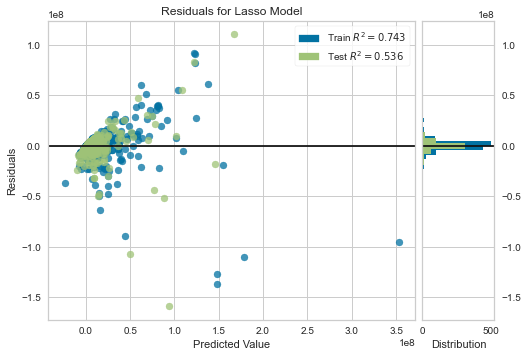

In [43]:
visualizer = ResidualsPlot(final_model_energy)
visualizer.fit(np.array(X_train), np.array(y_train).reshape(X_train.shape[0],))
visualizer.score(np.array(X_test), np.array(y_test).reshape(X_test.shape[0],))
visualizer.show();

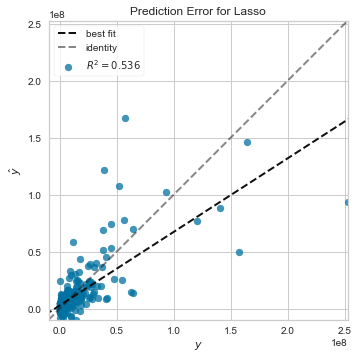

In [44]:
visualizer = prediction_error(final_model_energy, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test));

## 2 - Modelisation des émissions de CO2 (sans ENERGYSTARScore)

### 2.1. Modélisation des émissions de CO2 (sans ENERGYSTARScore) :  choix du modèle

In [45]:
TotalGHGEmissions_mean = df_joined_cleaned['TotalGHGEmissions'].mean()

In [46]:
TotalGHGEmissions_median = df_joined_cleaned['TotalGHGEmissions'].median()

In [47]:
def model_performance_CO2_emissions(y_test, y_pred):

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_div_mean = rmse / TotalGHGEmissions_mean
    rmse_div_median = rmse / TotalGHGEmissions_median
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("RMSE: ", rmse)
    print("RMSE/mean: ", rmse_div_mean)
    print("RMSE/median: ", rmse_div_median)
    print("R²: ", r_score.round(5))

On créé le jeu d'entraînement et le jeu de test spécifiques aux émissions de CO2 sans l'ENERGYSTAR Score.

In [48]:

train_set, test_set = train_test_split(df_joined_cleaned, test_size=0.2, random_state=42, stratify=df_joined_cleaned["PrimaryPropertyType"])

y_train_CO2 = train_set[["TotalGHGEmissions"]]
y_test_CO2 = test_set[["TotalGHGEmissions"]]
X_train_CO2 = train_set.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], axis=1)
X_test_CO2 = test_set.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], axis=1)

On définit les variables qualitatives et quantitatives nécessaires pour la modélisation des émissions de CO2 sans l'ENERGYSTARScore.

In [49]:
quali_var = ["PrimaryPropertyType", "LargestPropertyUseType"
]
quanti_var = ["LargestPropertyUseTypeGFA",
 "NumberofBuildings",
 "NumberofFloors",
 "PropertyGFABuilding(s)",
 "PropertyGFAParking",
 "YearBuilt"]

On créé le pipeline de transformation.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

quali_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

quanti_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('qualitative', quali_pipe, quali_var),
    ('quantitative', quanti_pipe, quanti_var)
])

On transforme les variables

In [51]:
X_train_CO2 = preprocessor.fit_transform(X_train_CO2)

In [52]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train_CO2, y_train_CO2)

DummyRegressor(strategy='median')

In [53]:
X_test_CO2 = preprocessor.transform(X_test_CO2)
y_pred_CO2 = dummy_reg.predict(X_test_CO2)
model_performance_CO2_emissions(np.array(y_test_CO2), y_pred_CO2)

RMSE:  485.4512511373817
RMSE/mean:  2.648839825170122
RMSE/median:  9.015297852962194
R²:  -0.05299


In [54]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

dummy_reg = DummyRegressor(strategy="median")
lin_reg = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
svm_reg = SVR()
rdmforest = RandomForestRegressor(random_state=42, n_estimators=500)
xgboost = xgb.XGBRegressor(random_state=42)

On effectue les entraînements pour chaque modèle sans optimiser les hyperparamètres.

In [55]:
model = [dummy_reg, lin_reg, ridge, lasso, svm_reg, rdmforest, xgboost, GradientBoostingRegressor()]
dict_model = {}

for model in model:
    model.fit(X_train_CO2, y_train_CO2.values.ravel())
    y_pred_CO2 = model.predict(X_test_CO2)
    rmse = np.sqrt(mean_squared_error(y_test_CO2, y_pred_CO2))
    rmse_div_mean = rmse / TotalGHGEmissions_mean
    rmse_div_median = rmse / TotalGHGEmissions_median
    r_score = r2_score(y_test_CO2, y_pred_CO2, multioutput="variance_weighted").round(3)
    dict_model[model] = (rmse.round(3), rmse_div_mean, rmse_div_median, r_score)

eval_model = pd.DataFrame(dict_model, index=["RMSE", "RMSE/mean", "RMSE/median",  "R²"])
eval_model.columns = ["Dummy Regressor", "Linear Regression", "Ridge", "Lasso", "SVM", "Random Forest", "XGBoost", "GradientBoostingRegressor"]

eval_model

,Dummy Regressor,Linear Regression,Ridge,Lasso,SVM,Random Forest,XGBoost,GradientBoostingRegressor
RMSE,485.451000,1.891808e+14,319.838000,311.869000,474.405000,221.953000,460.544000,199.378000
RMSE/mean,2.648840,1.032256e+12,1.745179,1.701699,2.588565,1.211075,2.512934,1.087897
RMSE/median,9.015298,3.513271e+12,5.939697,5.791715,8.810152,4.121880,8.552743,3.702644
R²,-0.053000,-1.599137e+23,0.543000,0.565000,-0.006000,0.780000,0.052000,0.822000


GradientBoostingRegressor donne le meilleur résultat.

### 2.2. Modélisation des émissions de CO2 (sans ENERGYSTARScore) :  choix des hyperparamètres

In [56]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [57]:
GBR = GradientBoostingRegressor()

In [58]:
from sklearn.model_selection import GridSearchCV

params = [{"max_features" : [1, 10, 20, 50],
           "min_samples_split": [1, 10, 20, 50],
           "min_samples_leaf" : [1, 5, 10, 50],
           "n_estimators" : [1, 10, 100, 1000, 2000, 5000]
}]

grid_search = GridSearchCV(estimator=GBR, param_grid=params, verbose = 5, n_jobs = 5)
grid_search.fit(X_train_CO2, y_train_CO2.values.ravel())

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan             nan  3.06086056e-02  1.31622923e-01
  4.32769033e-01  4.54535751e-01  3.99444097e-01  3.56725959e-01
 -2.52966071e-03  8.15821570e-02  3.65065401e-01  2.75557360e-01
  3.99862983e-01  3.21000601e-01 -3.14696885e-03  9.99897832e-02
  3.03891623e-01  3.31966026e-01  3.74524258e-01  1.32428982e-01
             nan             nan             nan             nan
             nan             nan  4.19554327e-04  4.34810835e-02
  3.45285763e-01  4.02178500e-01  3.76492219e-01  2.20568817e-01
 -7.62945623e-03  5.75682489e-02  3.78915689e-01  4.39237892e-01
  2.98633147e-01  2.70161559e-01  2.12986694e-04  2.60698024e-02
  2.61509158e-01  4.42735624e-01  4.06715039e-01  2.50966977e-01
             nan             nan             nan            

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=5,
             param_grid=[{'max_features': [1, 10, 20, 50],
                          'min_samples_leaf': [1, 5, 10, 50],
                          'min_samples_split': [1, 10, 20, 50],
                          'n_estimators': [1, 10, 100, 1000, 2000, 5000]}],
             verbose=5)

In [59]:
best_grid_CO2_emissions = grid_search.best_estimator_

In [60]:
best_grid_CO2_emissions

GradientBoostingRegressor(max_features=1, min_samples_split=10,
                          n_estimators=1000)

In [61]:
grid_search.best_params_

{'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

### 2.3. Validation du modèle de prédiction d'émissions de CO2 (sans ENERGYSTARScore) sur le jeu de test

In [62]:
final_model_CO2_emissions = grid_search.best_estimator_

In [63]:
final_predictions_emissions = final_model_CO2_emissions.predict(X_test_CO2)

In [64]:
model_performance_CO2_emissions(np.array(y_test_CO2), final_predictions_emissions)

RMSE:  229.2171047522251
RMSE/mean:  1.2507113623774773
RMSE/median:  4.256782668688892
R²:  0.76524


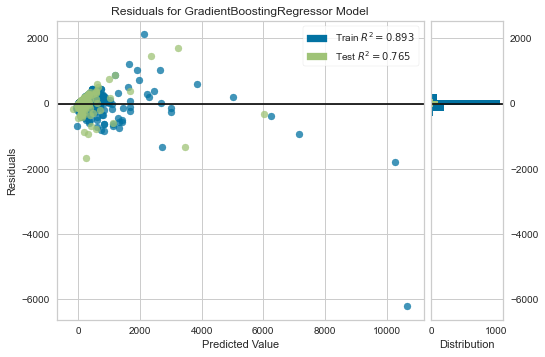

In [65]:
visualizer = ResidualsPlot(final_model_CO2_emissions)
visualizer.fit(np.array(X_train_CO2), np.array(y_train_CO2).reshape(y_train_CO2.shape[0],))
visualizer.score(np.array(X_test_CO2), np.array(y_test_CO2).reshape(y_test_CO2.shape[0],))
visualizer.show();

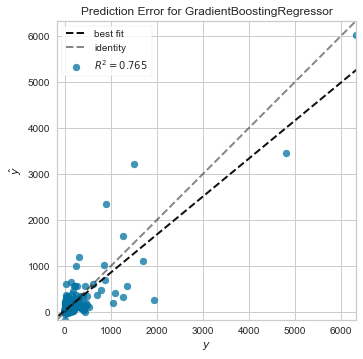

In [66]:
visualizer = prediction_error(final_model_CO2_emissions, np.array(X_train_CO2), np.array(y_train_CO2), np.array(X_test_CO2), np.array(y_test_CO2));

<br>

## 3 - Modelisation des émissions de CO2 (avec ENERGYSTARScore)

### 3.1. Modélisation des émissions de CO2 (avec ENERGYSTARScore) : choix du modèle

On créé le jeu d'entraînement et le jeu de test spécifiques aux émissions de CO2 avec l'ENERGYSTAR Score.

In [70]:
train_set, test_set = train_test_split(df_joined_cleaned, test_size=0.2, random_state=42, stratify=df_joined_cleaned["PrimaryPropertyType"])

y_train_CO2_avec_ENERGYSTARScore = train_set[["TotalGHGEmissions"]]
y_test_CO2_avec_ENERGYSTARScore = test_set[["TotalGHGEmissions"]]
X_train_CO2_avec_ENERGYSTARScore = train_set.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], axis=1)
X_test_CO2_avec_ENERGYSTARScore = test_set.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], axis=1)

On définit les variables qualitatives et quantitatives nécessaires pour la modélisation des émissions de CO2 sans l'ENERGYSTARScore.

In [71]:
quali_var_CO2_avec_ENERGYSTARScore = ["PrimaryPropertyType", "LargestPropertyUseType"
]
quanti_var_CO2_avec_ENERGYSTARScore = ["LargestPropertyUseTypeGFA",
 "NumberofBuildings",
 "NumberofFloors",
 "PropertyGFABuilding(s)",
 "PropertyGFAParking",
 "YearBuilt",
 "ENERGYSTARScore"]

On créé le pipeline de transformation.

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

quali_var_CO2_avec_ENERGYSTARScore = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

quanti_var_CO2_avec_ENERGYSTARScore = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('qualitative', quali_pipe, quali_var),
    ('quantitative', quanti_pipe, quanti_var)
])

On transforme les variables.

In [74]:
X_train_CO2_avec_ENERGYSTARScore = preprocessor.fit_transform(X_train_CO2_avec_ENERGYSTARScore)

In [75]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train_CO2_avec_ENERGYSTARScore, y_train_CO2_avec_ENERGYSTARScore)

DummyRegressor(strategy='median')

In [76]:
X_test_CO2_avec_ENERGYSTARScore = preprocessor.transform(X_test_CO2_avec_ENERGYSTARScore)
y_pred_CO2_avec_ENERGYSTARScore = dummy_reg.predict(X_test_CO2_avec_ENERGYSTARScore)
model_performance_CO2_emissions(np.array(y_test_CO2_avec_ENERGYSTARScore), y_pred_CO2_avec_ENERGYSTARScore)

RMSE:  485.4512511373817
RMSE/mean:  2.648839825170122
RMSE/median:  9.015297852962194
R²:  -0.05299


In [77]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

dummy_reg = DummyRegressor(strategy="median")
lin_reg = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
svm_reg = SVR()
rdmforest = RandomForestRegressor(random_state=42, n_estimators=500)
xgboost = xgb.XGBRegressor(random_state=42)

On effectue les entraînements pour chaque modèle sans optimiser les hyperparamètres.

In [78]:
model = [dummy_reg, lin_reg, ridge, lasso, svm_reg, rdmforest, xgboost, GradientBoostingRegressor()]
dict_model = {}

for model in model:
    model.fit(X_train_CO2_avec_ENERGYSTARScore, y_train_CO2_avec_ENERGYSTARScore.values.ravel())
    y_pred_CO2_avec_ENERGYSTARScore = model.predict(X_test_CO2_avec_ENERGYSTARScore)
    rmse = np.sqrt(mean_squared_error(y_test_CO2_avec_ENERGYSTARScore, y_pred_CO2_avec_ENERGYSTARScore))
    rmse_div_mean = rmse / TotalGHGEmissions_mean
    rmse_div_median = rmse / TotalGHGEmissions_median
    r_score = r2_score(y_test_CO2_avec_ENERGYSTARScore, y_pred_CO2_avec_ENERGYSTARScore, multioutput="variance_weighted").round(3)
    dict_model[model] = (rmse.round(3), rmse_div_mean, rmse_div_median, r_score)

eval_model = pd.DataFrame(dict_model, index=["RMSE", "RMSE/mean", "RMSE/median",  "R²"])
eval_model.columns = ["Dummy Regressor", "Linear Regression", "Ridge", "Lasso", "SVM", "Random Forest", "XGBoost", "GradientBoostingRegressor"]

eval_model

,Dummy Regressor,Linear Regression,Ridge,Lasso,SVM,Random Forest,XGBoost,GradientBoostingRegressor
RMSE,485.451000,1.891808e+14,319.838000,311.869000,474.405000,221.953000,460.544000,198.746000
RMSE/mean,2.648840,1.032256e+12,1.745179,1.701699,2.588565,1.211075,2.512934,1.084449
RMSE/median,9.015298,3.513271e+12,5.939697,5.791715,8.810152,4.121880,8.552743,3.690911
R²,-0.053000,-1.599137e+23,0.543000,0.565000,-0.006000,0.780000,0.052000,0.824000


GradientBoostingRegressor donne le meilleur résultat.

### 3.2. Modélisation des émissions de CO2 (sans ENERGYSTARScore) : choix des hyperparamètres

In [79]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [80]:
GBR = GradientBoostingRegressor()

In [81]:
from sklearn.model_selection import GridSearchCV

params = [{"max_features" : [1, 10, 20, 50],
           "min_samples_split": [1, 10, 20, 50],
           "min_samples_leaf" : [1, 5, 10, 50],
           "n_estimators" : [1, 10, 100, 1000, 2000, 5000]
}]

grid_search = GridSearchCV(estimator=GBR, param_grid=params, verbose = 5, n_jobs = 5)
grid_search.fit(X_train_CO2_avec_ENERGYSTARScore, y_train_CO2_avec_ENERGYSTARScore.values.ravel())

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
  0.02403011  0.09286366  0.41302696  0.39973824  0.17737587  0.37772498
  0.0052867   0.08173289  0.33836868  0.38894695  0.34559265  0.37662352
 -0.00595381  0.08422776  0.34875258  0.42965623  0.38232072  0.21519813
         nan         nan         nan         nan         nan         nan
 -0.00767332  0.04058615  0.35559916  0.4208517   0.29114236  0.3072934
 -0.00582493  0.03833853  0.22931607  0.40298566  0.33735049  0.23141959
 -0.00770587  0.03650619  0.26366319  0.47662092  0.41335163  0.30625424
         nan         nan         nan         nan         nan         nan
 -0.00728761  0.05580066  0.18015192  0.4301727   0.3585896   0.26365871
 -0.0053229   0.05447293  0.22936881  0.40430173  0.35599319  0.26338791
 -0.0074186   0.03224976  0.17207084  

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=5,
             param_grid=[{'max_features': [1, 10, 20, 50],
                          'min_samples_leaf': [1, 5, 10, 50],
                          'min_samples_split': [1, 10, 20, 50],
                          'n_estimators': [1, 10, 100, 1000, 2000, 5000]}],
             verbose=5)

In [82]:
best_grid_CO2_emissions_avec_ENERGYSTARScore = grid_search.best_estimator_

In [83]:
best_grid_CO2_emissions_avec_ENERGYSTARScore

GradientBoostingRegressor(max_features=1, min_samples_leaf=5,
                          min_samples_split=50, n_estimators=1000)

In [84]:
grid_search.best_params_

{'max_features': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 1000}

### 3.3. Validation du modèle de prédiction d'émissions de CO2 (sans ENERGYSTARScore) sur le jeu de test

In [85]:
final_model_CO2_emissions_avec_ENERGYSTARScore = grid_search.best_estimator_

In [86]:
final_predictions_emissions_avec_ENERGYSTARScore = final_model_CO2_emissions_avec_ENERGYSTARScore.predict(X_test_CO2_avec_ENERGYSTARScore)

In [87]:
model_performance_CO2_emissions(np.array(y_test_CO2_avec_ENERGYSTARScore), final_predictions_emissions_avec_ENERGYSTARScore)

RMSE:  237.035930119501
RMSE/mean:  1.2933743815176415
RMSE/median:  4.401985795431561
R²:  0.74895


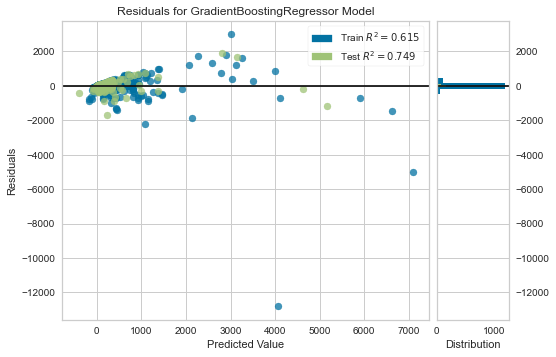

In [88]:
visualizer = ResidualsPlot(final_model_CO2_emissions_avec_ENERGYSTARScore)
visualizer.fit(np.array(X_train_CO2_avec_ENERGYSTARScore), np.array(y_train_CO2_avec_ENERGYSTARScore).reshape(y_train_CO2_avec_ENERGYSTARScore.shape[0],))
visualizer.score(np.array(X_test_CO2_avec_ENERGYSTARScore), np.array(y_test_CO2_avec_ENERGYSTARScore).reshape(y_test_CO2_avec_ENERGYSTARScore.shape[0],))
visualizer.show();

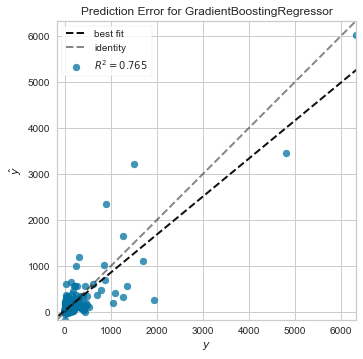

In [89]:
visualizer = prediction_error(final_model_CO2_emissions, np.array(X_train_CO2_avec_ENERGYSTARScore), np.array(y_train_CO2_avec_ENERGYSTARScore), np.array(X_test_CO2_avec_ENERGYSTARScore), np.array(y_test_CO2_avec_ENERGYSTARScore));